<a href="https://colab.research.google.com/github/huda-nur-ed/Capstone-Project--Airline-Passenger-Referral-Prediction/blob/main/Team_4_capstone_project_Airline_Passenger_Referral_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Dataset discription
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.
Feature descriptions briefly as follows:
* airline: Name of the airline.
* overall: Overall point is given to the trip between 1 to 10.
* author: Author of the trip
* reviewdate: Date of the Review
* customer review: Review of the customers in free text format
 
* aircraft: Type of the aircraft
* traveller type: Type of traveler (e.g. business, leisure)
* cabin: Cabin at the flight
* date flown: Flight date
* seat comfort: Rated between 1-5
* cabin service: Rated between 1-5
* food bev: Rated between 1-5
* entertainment: Rated between 1-5
* ground service: Rated between 1-5
* value for money: Rated between 1-5

##Objective
The main objective is to predict whether passengers will refer the airline to their friends.

In [ ]:
# Importing libraries for visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

In [ ]:
# Importing  metrics for evaluation for our models
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Reading the xlsx file from the drive
main_df = pd.read_excel('/content/drive/MyDrive/AlmaBetter/capstone project/Airline Passenger Referral Prediction/data_airline_reviews.xlsx') 

In [ ]:
# Get a view of dataset rows and columns
main_df

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

By looking at info() function we can undesrtand that there are total 131895 rows and max non NaN value count was 65947 only, so it concluded that every odd row is a NaN.

So we thought of droping all odd rows from dataset, but then we realise we are still getting NaN rows in end of dataset. 

After looking at dataset properly we realised that upeer half datset have NaN values in odd rows whereas lower half have NaN values in even rows.


In [ ]:
# droping the rows which have all values as NaN
main_df.dropna(how='all',inplace=True)        


###Duplicate values

In [ ]:
#Counting number of duplicate values
main_df.duplicated().sum()

0

In [ ]:
#Droping duplicate rows
main_df.drop_duplicates(inplace=True)

##EDA

In [ ]:
# Get shape of dataset after removing duplicte and all NaN value rows
main_df.shape

(61183, 17)

In [ ]:
# Get a descriptive summary of dataset
main_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61183 entries, 1 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          61183 non-null  object 
 1   overall          59401 non-null  float64
 2   author           61183 non-null  object 
 3   review_date      61183 non-null  object 
 4   customer_review  61183 non-null  object 
 5   aircraft         18488 non-null  object 
 6   traveller_type   37540 non-null  object 
 7   cabin            58705 non-null  object 
 8   route            37513 non-null  object 
 9   date_flown       37434 non-null  object 
 10  seat_comfort     56211 non-null  float64
 11  cabin_service    56240 non-null  float64
 12  food_bev         48341 non-null  float64
 13  entertainment    40230 non-null  float64
 14  ground_service   37169 non-null  float64
 15  value_for_money  59327 non-null  float64
 16  recommended      59761 non-null  object 
dtypes: float64(

In [ ]:
# Get the number of aircrafts of each type
top_n_aircraft_type = main_df['aircraft'].value_counts()
top_n_aircraft_type

A320                               2130
A380                               1109
Boeing 777                         1101
Boeing 737-800                     1021
A330                                974
                                   ... 
A330/320                              1
A346 & A388                           1
Boeing 777 and A350-900               1
AC 173                                1
Boeing 777-300 and Boeing 787-8       1
Name: aircraft, Length: 2088, dtype: int64

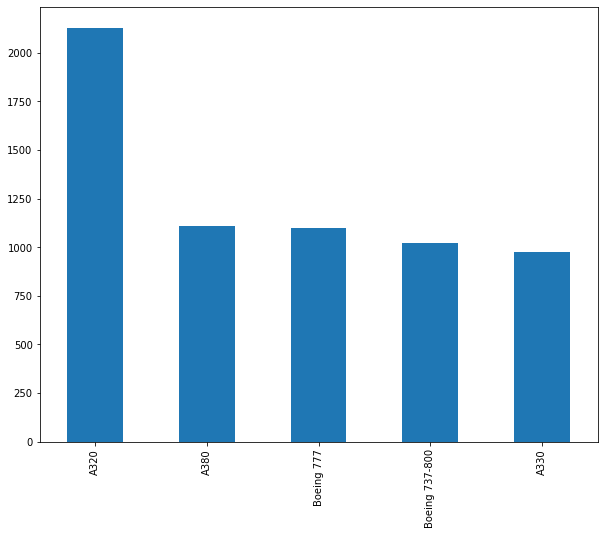

In [ ]:
# Visualize the top 5 most frequently flown aircarft types
plt.figure(figsize=(10,8))
top_n_aircraft_type[:5].plot(kind='bar')

We have observed that the top 5 type of aircrafts that has maximum trips are-
1. A320
2. A380
3. Boeing 777
4. Boeing 737-800
5. A330

Among these, A320 has the highest number of trips.This is due to the fact that most airlines prefer to have this type of aircraft due to its medium passenger capacity and low operational cost.

In [ ]:
# Get the number of trips each airline make.
top_n_airline = main_df['airline'].value_counts()
top_n_airline

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

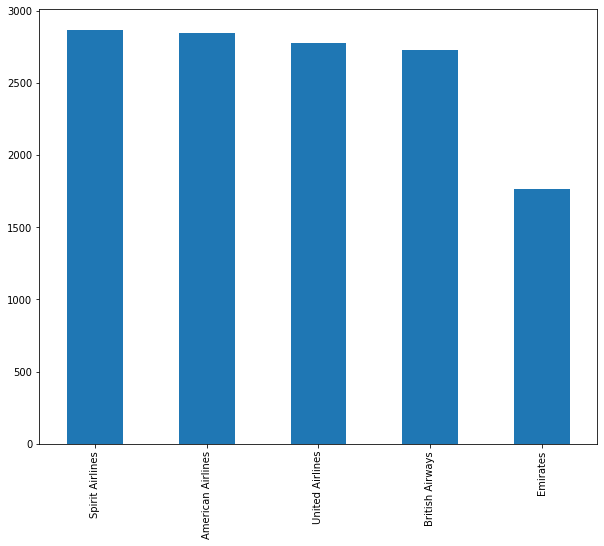

In [ ]:
# Visualize the top 5 airlines with most trips
plt.figure(figsize=(10,8))
top_n_airline[:5].plot(kind='bar')

We have observed that the top 5 airlines with most trips are-
1. Spirit Airlines
2. American Airlines
3. United Airlines
4. British Airways
5. Emirates

Spirit Airlines has the maximum number of trips and this can be attributed to its ultra low cost fare compared to other airlines.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


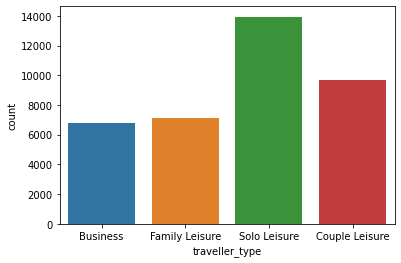

In [ ]:
# Get the countplot of traveller_type feature
sns.countplot(main_df['traveller_type'])

From the above graph, we have observed that-
* there are four categories of traveller viz.Business,Family,Solo and Couple.
* Solo type of travellers are more in number compared to other types.This can be even backed by the fact that majority of the people around the world travel alone.

In [ ]:
# Change the 'date_flown' column to datetime type
main_df['date_flown'] = main_df['date_flown'].apply(lambda x:pd.to_datetime(x))

In [ ]:
# Create a column 'travel_month' to identify in which month the passengers travel
main_df['travel_month'] = main_df['date_flown'].dt.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


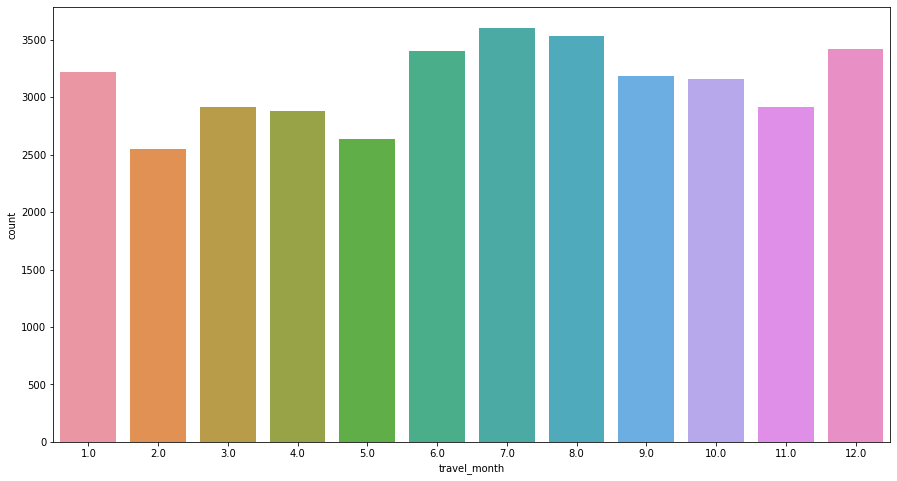

In [ ]:
# Get countplot of 'travel_month' feature
plt.figure(figsize=(15,8))
sns.countplot(main_df['travel_month'])

From the above graph, we have observed that-
* June,July,August and December are the months in which passengers travel most. This is due to the fact that these months are when people usually take summer and winter vacations and spend their time away from work.

* February,March,April and April are the months with lesser number of trips as these months are busy months.

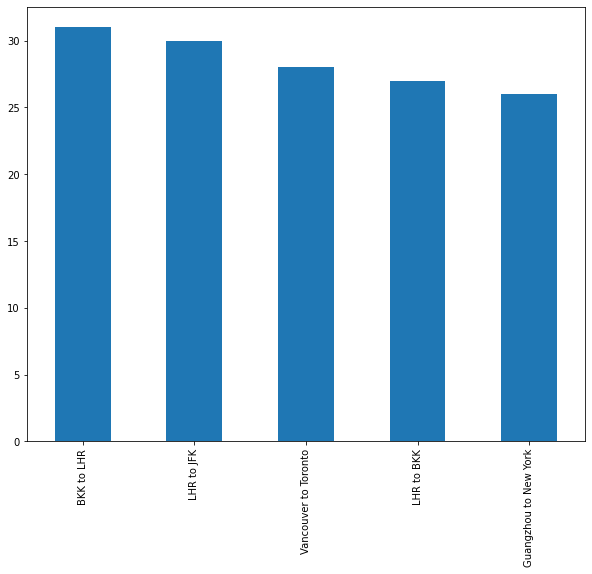

In [ ]:
# Get the top 5 most flown route through visualization
plt.figure(figsize=(10,8))
main_df['route'].value_counts()[:5].plot(kind='bar')

From the above graph, we have observed that the top 5 most flown route are-
1. BKK to LHR
2. LHR to JKF
3. Vancover to Toronto
4. LHR to BKK
5. Guangzhou to New York


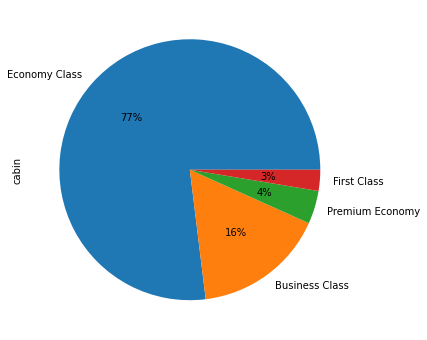

In [ ]:
# Get the number of passengers for each cabin class through pie chart visualization
main_df['cabin'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(15,6))

From the above graph, we have observed that-
* 77% of passengers chose to fly in economy class as this category fare is lesser.
* Only 16% chose to fly by business class.

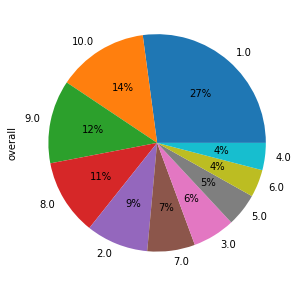

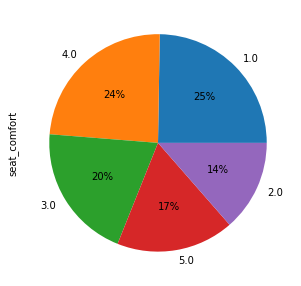

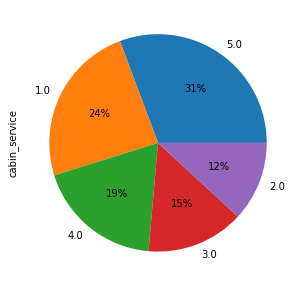

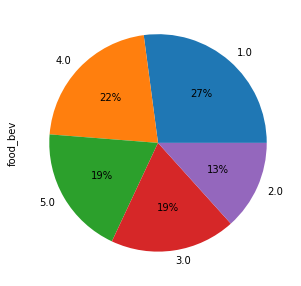

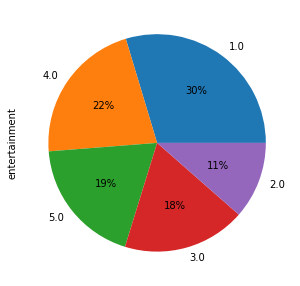

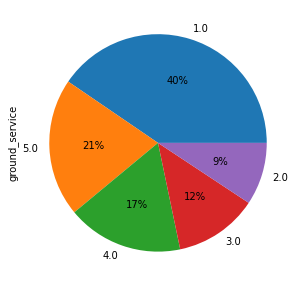

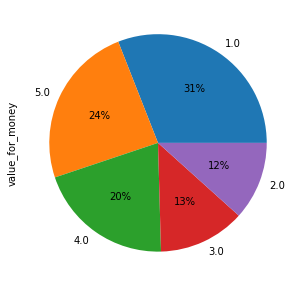

In [ ]:
# Get the percentage distribution of passengers with different ratings for numerical features
for col in ['overall','seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']:
  fig = plt.figure(figsize=(10, 5))
  ax = fig.gca()
  main_df[col].value_counts().plot(kind='pie',autopct='%1.0f%%')

From the above graphs, we have observed that-
* 44 % of passengers gave an overall rating of 7 and above on a scale of 10, for the services offered by the airlines.It implies that this section of people think that airlines are giving good services.

* 25 % of passengers are not satisfied with seat comfort.31% of passengers are fully statisfied with the cabin services.

* 41% of passengers are satisfied with food and beverages provided and 30% of passengers extremely dislikes the entertaintment service provided.

* 40% of passengers extremely dislikes the ground service and 44 % considers the trip to be value for money.

In [ ]:
#Function for Stacked plot of rating features
def stacked_plot(feat):
  ''' Stacked plot of rating features'''
  x = main_df.groupby([main_df['overall']])
  x[feat].value_counts().unstack().plot(kind= 'bar',stacked = True, figsize=(12,6))

In [ ]:
review_features = ['seat_comfort','cabin_service','food_bev','entertainment', 'ground_service', 'value_for_money']

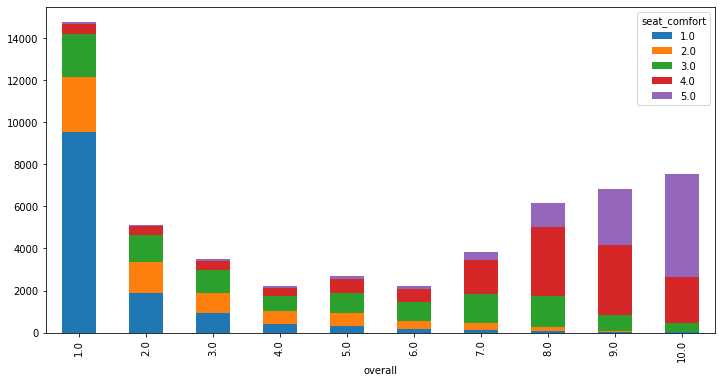

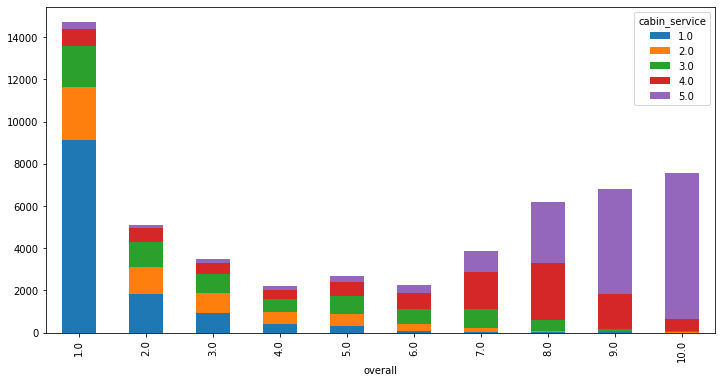

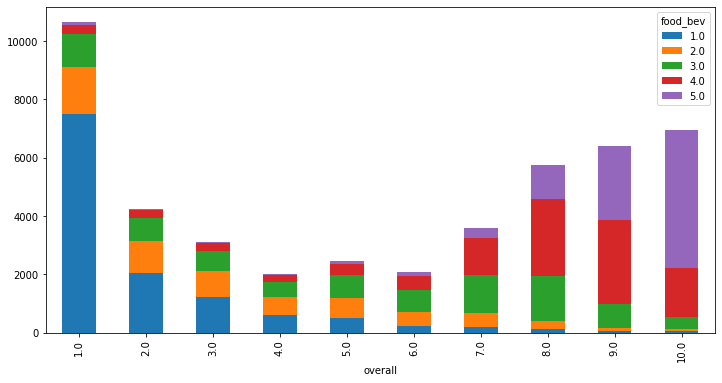

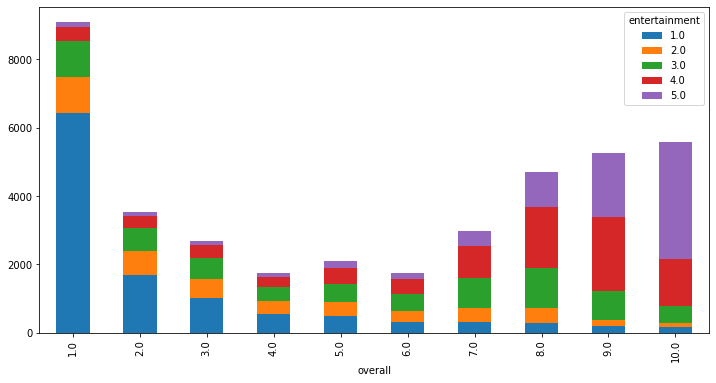

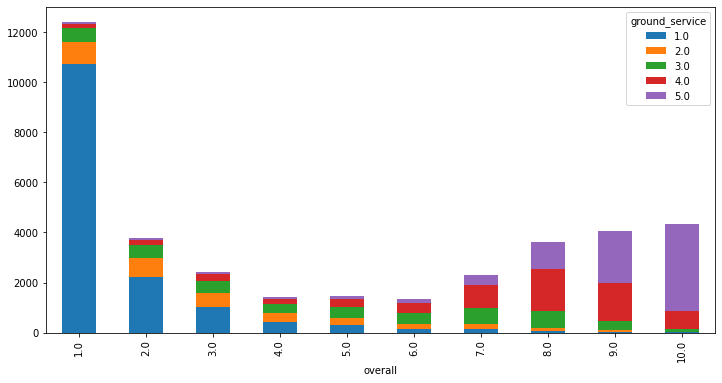

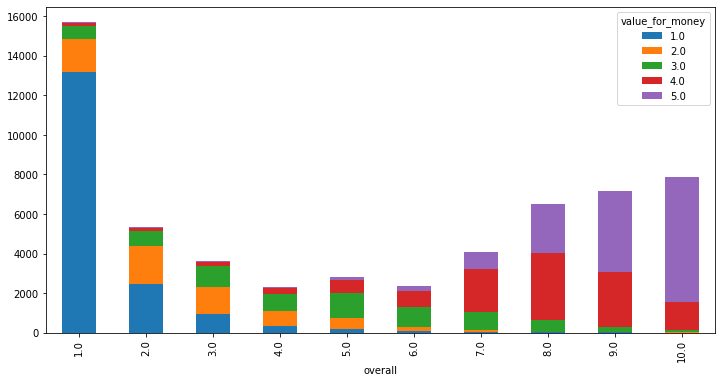

In [ ]:
# Get Stacked plot of rating features.
for feat in review_features:
  stacked_plot(feat)

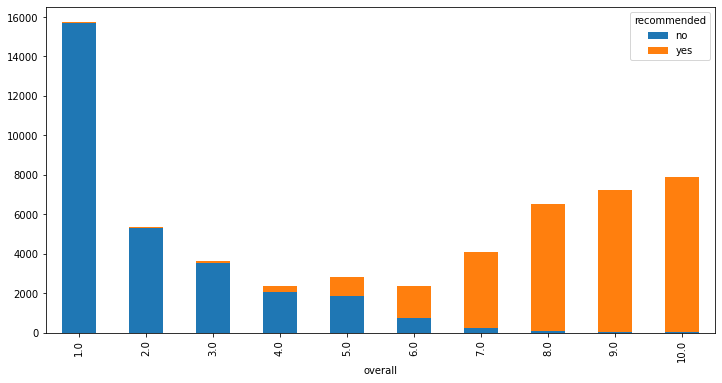

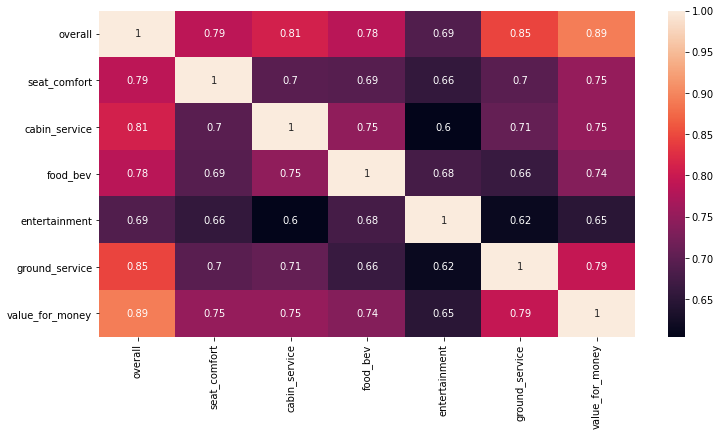

In [ ]:
# Get correlation mtarix on different rating features
cor_matrix =abs( main_df.drop('travel_month',axis=1).corr())

# Get heatmap of correlation matrix on the dataset
plt.figure(figsize=(12,6))
sns.heatmap(cor_matrix,annot = True)

###Imputing NaN values 


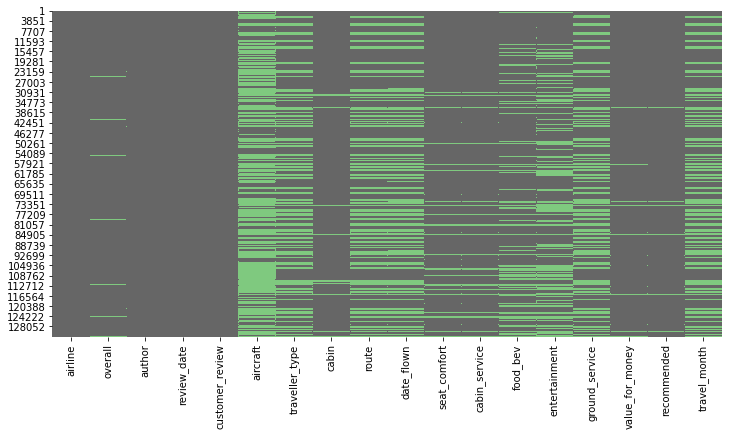

In [ ]:
#Ploting heatmap to see NaN values in each features
plt.figure(figsize=(12,6))
sns.heatmap(main_df.isna(),cbar=False,cmap='Accent_r')

In [ ]:
# Counting  NaN values in each features
main_df.isna().sum()

airline                0
overall             1782
author                 0
review_date            0
customer_review        0
aircraft           42695
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort        4972
cabin_service       4943
food_bev           12842
entertainment      20953
ground_service     24014
value_for_money     1856
recommended         1422
travel_month       23749
dtype: int64

From above, we can see that there are many Nan values present in most of the features.

###Describe dataset to find out statistical summary.

In [ ]:
# Finding statistical value of numerical columns
main_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,travel_month
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000,37434.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849,6.655607
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433,3.423703
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,10.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000


### Checking  Imbalance in dataset

---



/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


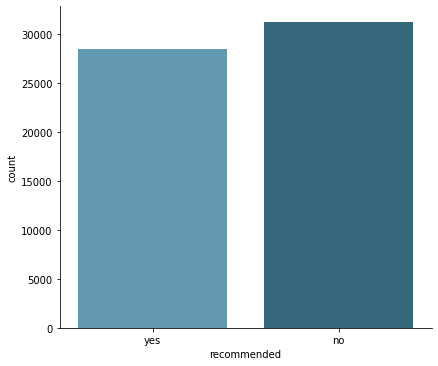

In [ ]:
# Ploting a bar graph to show count of class in recommended feature
sns.factorplot(x="recommended", data=main_df, kind="count", size=5, aspect=1.2, palette="PuBuGn_d")
plt.show()

In [ ]:
#No of nan values in recommeded column
main_df['recommended'].isna().sum()

1422

### Understanding relation Between Target variable and Independent variable

In [ ]:
# Features present in dataset
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

In [ ]:
# Creating list of idependent variable which hare numerical or having low class in features 
features_1= features.drop(['airline','author','aircraft','review_date', 'customer_review','route','recommended'])

overall


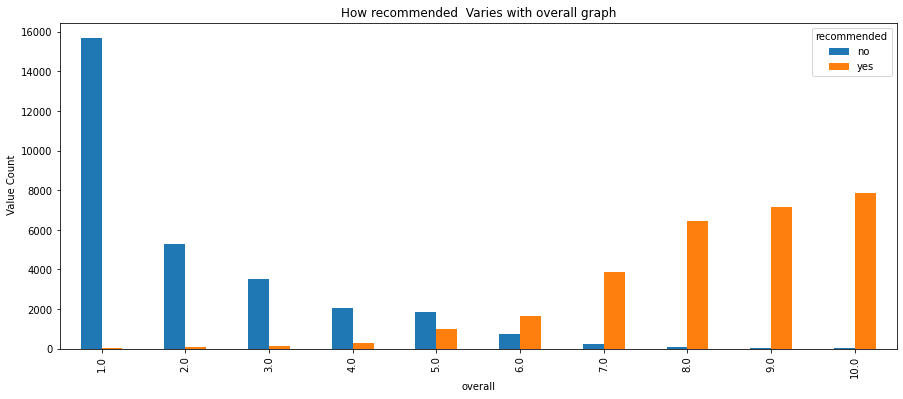

traveller_type


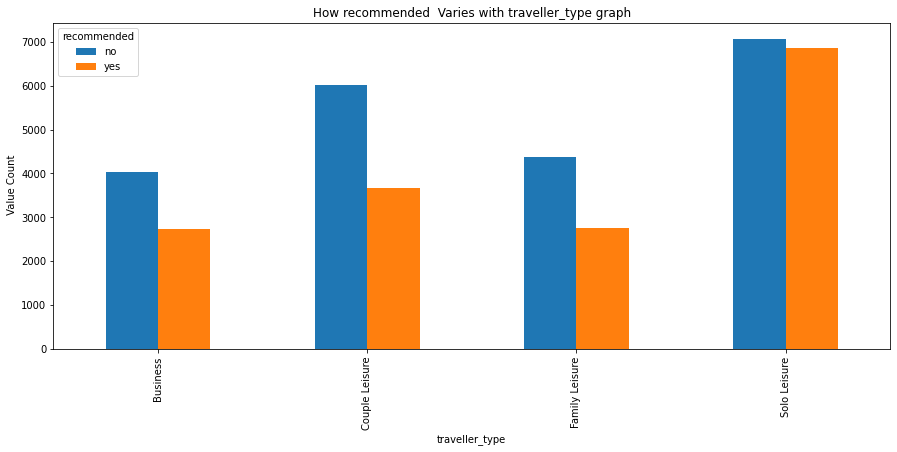

cabin


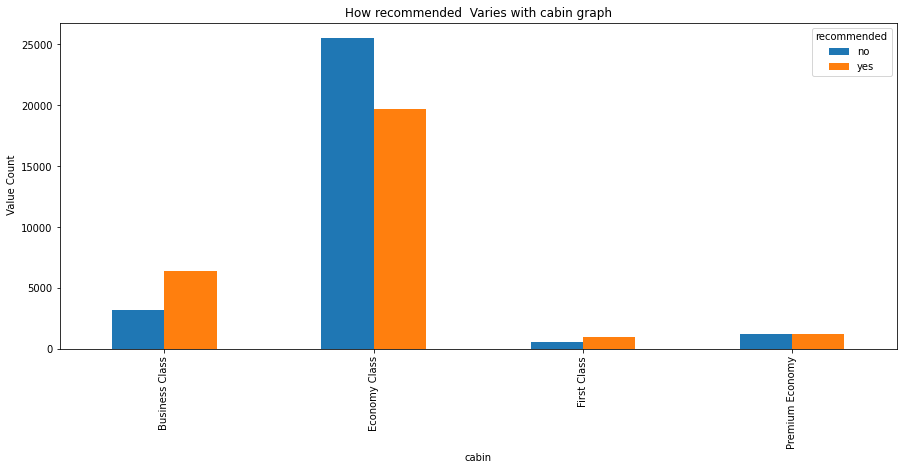

date_flown


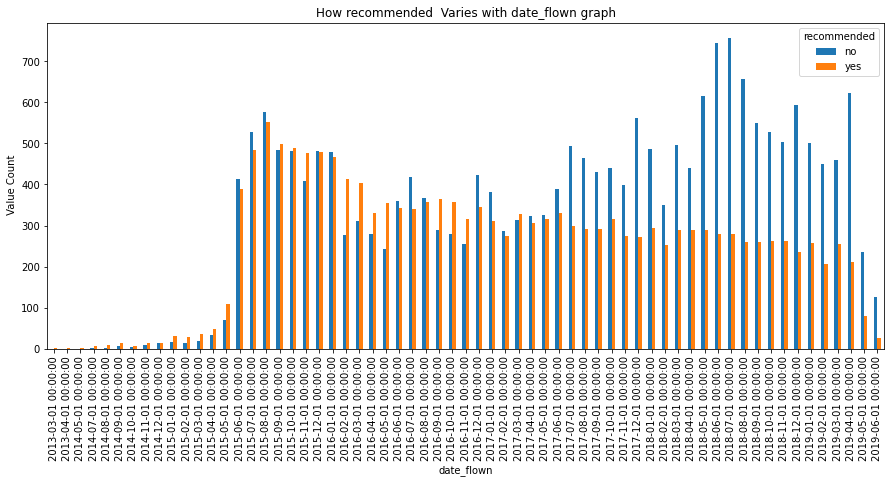

seat_comfort


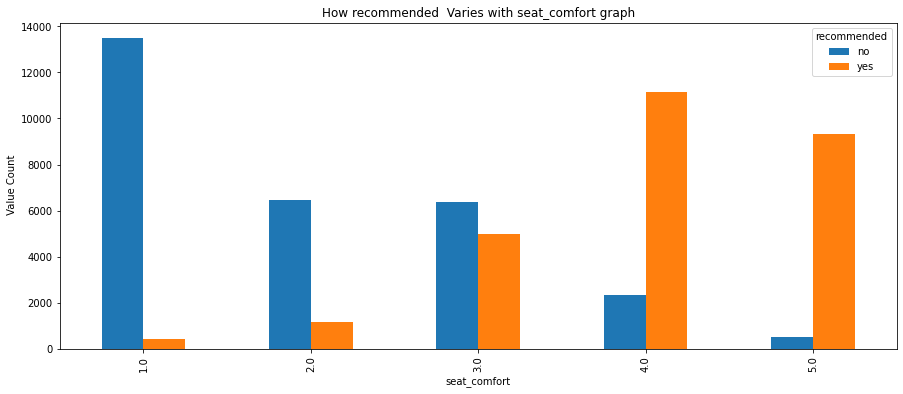

cabin_service


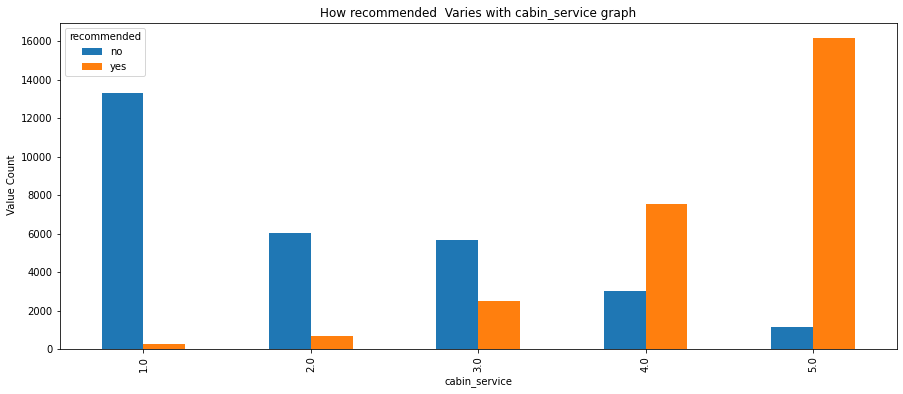

food_bev


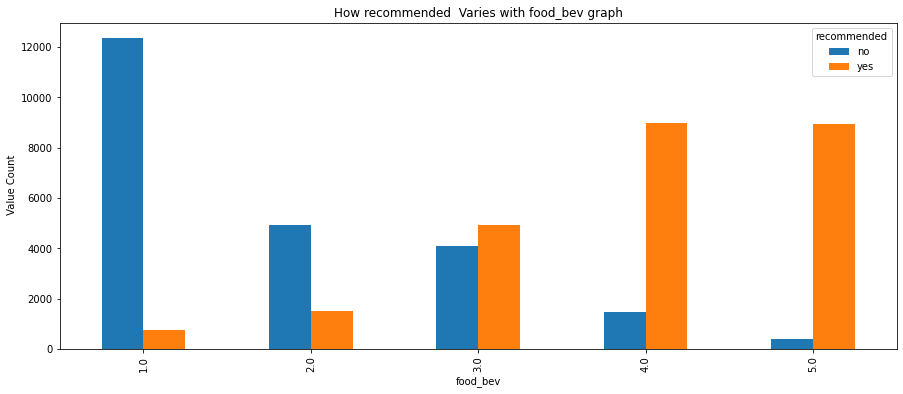

entertainment


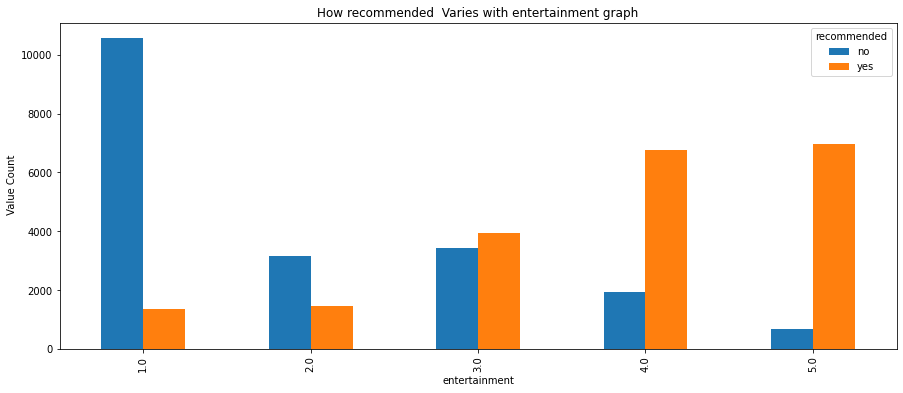

ground_service


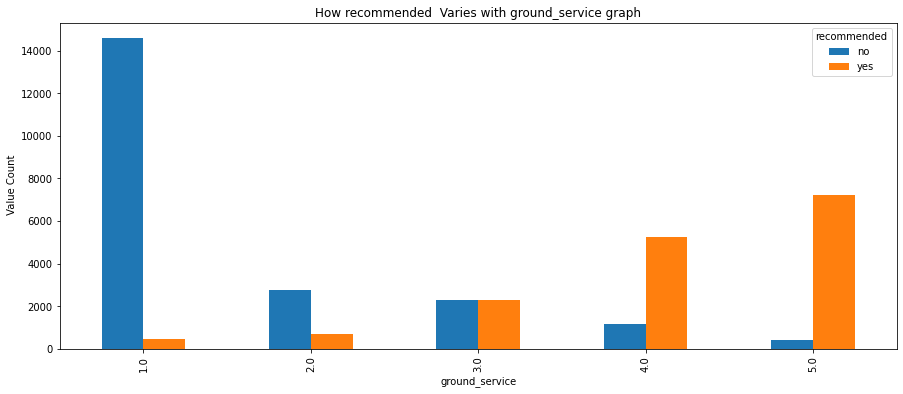

value_for_money


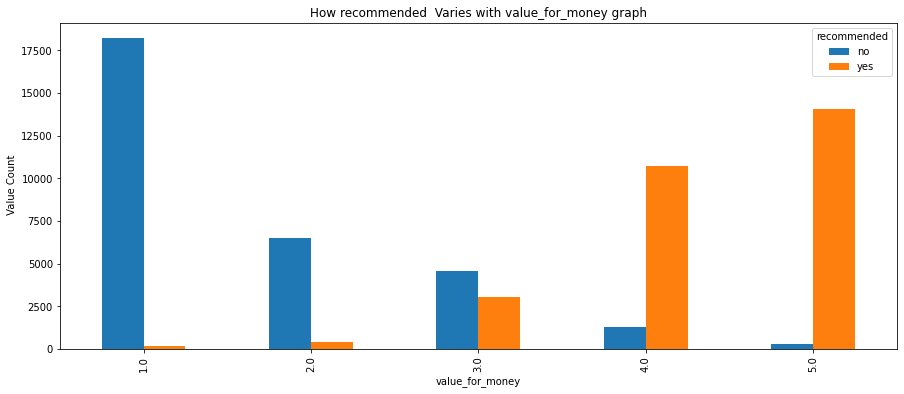

travel_month


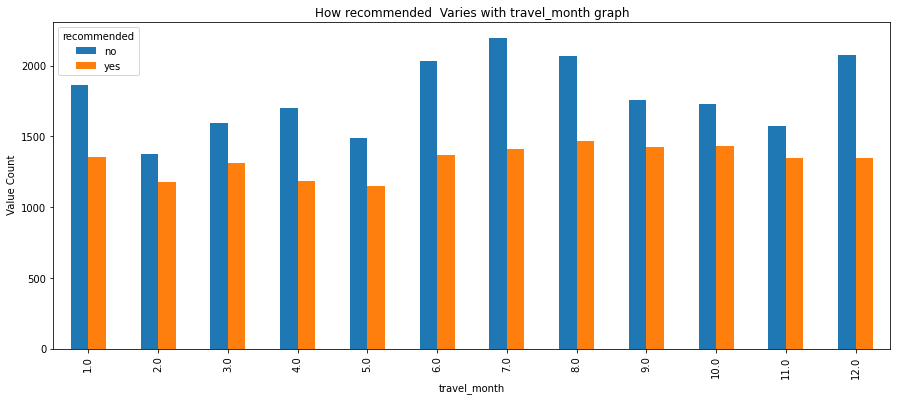

In [ ]:
# Ploting graph of count of feature grouped by target variable 
for feature in features_1:
  print(feature)
  main_df.groupby([feature])['recommended'].value_counts().unstack().plot(kind='bar',figsize=(15,6))
  plt.title(f'How recommended  Varies with {feature} graph')
  plt.ylabel(' Value Count')
  plt.xlabel(feature)
  plt.show()


###Conclusion of above graphs

**Numerical Features**
* From all above graphs we can see that when a person have given higher rating then we have also recommended to the  friend.
* We can also see some anomilities where a person have given very low rating and still recommended and visa versa.

> Overall feature
 * So one thing we can be sure of that if a person have given an overall rating of less than 2 we wont be recommended.
 * Whereas a person who have given a rating greater than 8 there are high chances that he will recommend.

**Categorical Features**
> Travel Type
 * The number of not recommended is higher in all the Travel type class
 but couple is one class where the diffrence is higher Where as solo class have minimun diffrence.
 * From above we can conclude that people travelling in groups face more problems than people travelling alone.

> Cabin
 * Economy class is most unsatisfied by the services provided by the airline, thats why majority of them are not recommending.




##Imputation of Missing values in Target variable

For imputing target variable we have two way,
* Till now we understood that Overall feature is highly correlated to target variable. we create a simple model with help of if and else statement. 
* we have done sentiment analysis on text column and build a Naive bayes model with text column and Target columns.

We compared the accuracy of both the model and we found that model with overall feature have higher accuracy so we used this method to impute missing value in target variable.



In [ ]:
# Building a simple function to inpute the target variable 
def target(x):
  if x < 5:
    return 'no'
  else:
    return 'yes'

In [ ]:
# Get predictions
pred= [target(x) for x in main_df.overall]

In [ ]:
len(main_df.recommended.tolist())

61183

In [ ]:
# Get accuracy
accuracy_score(main_df.recommended.astype(str), pred)

0.8906885899678015

#### Imputing the recommended column using the overall rating

In [ ]:
# Total NaN values before imputation
main_df['recommended'].isna().sum()

1422

In [ ]:
# Finding all the datapoints with NaN values in the recommended column
sub_df= main_df[main_df['recommended'].isna()]
sub_df.shape

(1422, 18)

In [ ]:
# Total NaN values in the overall rating column in the subset
sub_df.overall.isna().sum()

18

In [ ]:
# Imputing traget variable missing value
sub_df['pred']= [target(x) for x in sub_df.overall]
main_df['recommended'].fillna(value= sub_df['pred'],inplace = True, axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Checking the final dataset with no NaN values in the terget variable
main_df['recommended'].isna().sum()

0

## Removing Non important features from dataset


As from heat map we can see that there are few features which have NaN values, it would be right decision to drop the features which have More that 60% values as NaN, as imputing them will only create baisness in the dataset

In [ ]:
# Function to show percentage of NAN value in each column
def null_percentage(name):
  'this function will collect all features which have nan vaalues more than 60%'
  drop_features =[]
  for i in name:
    null_value= main_df[i].isna().sum()
    if (null_value/len(main_df)) > 0.6:
      drop_features.append(i)

  return drop_features

In [ ]:
features= main_df.columns
features

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'travel_month'],
      dtype='object')

In [ ]:
droping_features= null_percentage(features)
droping_features


['aircraft']

In [ ]:
# No. of different aircraft present in aircraft column 
len(main_df.aircraft.unique())

2089

In [ ]:
# Droping the feature
main_df.drop(droping_features,axis=1,inplace=True)

#### Imputing NaN in numerical columns

* We have 7 numerical columns. 

* If a person have given high review to seat_comfort, food_bev, ground service, cabin_service ,entertainment then there is high chance that overall ratting will also be high and visa versa.

* We have also seen that recommended is highly dependent on overall review.


Let's try to find all rows which have nan values for every numerical variable.

In [ ]:
main_df.head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes,5.0
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no,5.0
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no,5.0
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,4.0
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01,1.0,1.0,1.0,1.0,1.0,1.0,no,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


In [ ]:
# Selcting all rows which have numeriacal feature as Nan
Nan_no = (main_df['overall'].isna()) & (main_df['recommended']=='no') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna() & (main_df['cabin_service'].isna()))

In [ ]:
# Checking the rows 
main_df[Nan_no].head()

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
13775,KLM Royal Dutch Airlines,NaN,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
14435,Virgin America,NaN,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
23179,Delta Air Lines,NaN,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
25095,Southwest Airlines,NaN,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
30721,United Airlines,NaN,Pipitone Nicolo,8th June 2014,Washington Dulles to San Diego Intl Airport. F...,NaN,Economy Class,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,NaN,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131888,Ukraine International,NaN,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN


Here we found all rows which have recommended as no and NaN values in all review columns.We will be replacing these NaN values whith 1.

In [ ]:
# Fill Nan values by 1
main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df.loc[Nan_no,['overall','seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(1)

In [ ]:
# checking the dataframe after imputation
main_df.loc[Nan_no]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month
13775,KLM Royal Dutch Airlines,1.0,H Henry,6th August 2014,Amsterdam to LHR - travelled on KLM after 14 y...,NaN,Business Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
14435,Virgin America,1.0,Kathleen Daley,24th February 2015,I was sending 3 people out to Los Angeles for ...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
23179,Delta Air Lines,1.0,C Tellefsen,14th September 2014,I keep making the mistake of choosing Delta. I...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
25095,Southwest Airlines,1.0,A Morgan,29th November 2013,I have been a Southwest customer for years and...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
30721,United Airlines,1.0,Pipitone Nicolo,8th June 2014,Washington Dulles to San Diego Intl Airport. F...,NaN,Economy Class,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131888,Ukraine International,1.0,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131890,Ukraine International,1.0,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN
131892,Ukraine International,1.0,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN


#### When recommended is YES,

* the numerical features are having NaN values.

* replacing those NaN values to a valid value on the bases of recommended column.

In [ ]:
Nan_yes=(main_df['overall'].isna()) & (main_df['recommended']=='yes') & (main_df['seat_comfort'].isna()) & (main_df['food_bev'].isna()) & (main_df['entertainment'].isna()) & (main_df['ground_service'].isna() & main_df['value_for_money'].isna())

In [ ]:
# Fillinng Nan vaues by 5
main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] =main_df.loc[Nan_yes,['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(5)

### Replacing NaN values in numerical features apart from overall feature to median values of respected features

In [ ]:
main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']] = main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].fillna(main_df[['seat_comfort','food_bev','entertainment','ground_service','value_for_money','cabin_service']].median())

In [ ]:
main_df.isna().sum()

airline                0
overall             1658
author                 0
review_date            0
customer_review        0
traveller_type     23643
cabin               2478
route              23670
date_flown         23749
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
travel_month       23749
dtype: int64

###Creating a Average column which have avrg score of (all numerical features except overall)

In [ ]:
main_df['Avg_num']= (main_df['seat_comfort']+ main_df['cabin_service']+ main_df['food_bev']+main_df['entertainment']+main_df['ground_service']+main_df['value_for_money'])//6

### Finding NaN in overall feature
We will be replacing all Nan values in overall feature by avg colummn

In [ ]:
# Finding all nan values in overall
m=(main_df['overall'].isna())

In [ ]:
# Filling NaN value in overall with 2* avg num
main_df.loc[m,'overall']= main_df.loc[m,'Avg_num']*2

##Working on Anomaly

### Finding anomaly in overall feature with respect to recommended



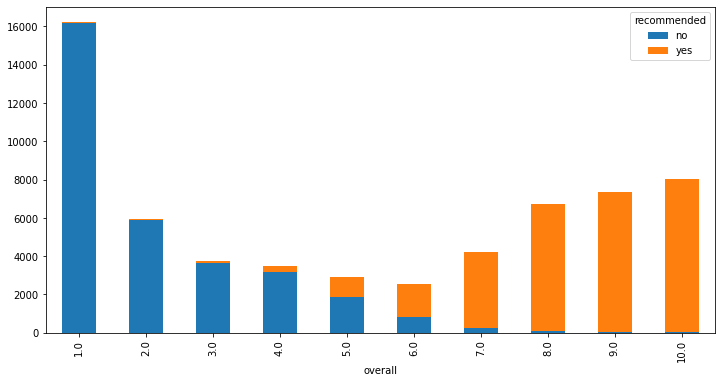

In [ ]:
# Get plot for the relationship between Recommendation and Overall rating.
stacked_plot('recommended')


In above graph we can see that there are few rows in which a person have given 1 or 2 rating still he have recommended it to his friend and visa versa that is not true in real life.



Finding overall values which are wrongly classified as (1,2) where there average is higher than 2.Replacing these values as 2* avg_value.



In [ ]:
# Selecting all rows which have avg_num rating higher than 2 and recommended is yes 
# whereas overall column have rating <=2
wrong_overall = (main_df['Avg_num']>3) & (main_df['recommended']=='yes') & (main_df['overall']<=2)

In [ ]:
# Replacing overall value to 2* avg value
main_df.loc[wrong_overall,'overall'] = main_df.loc[wrong_overall,'Avg_num']*2 

In [ ]:
main_df[(main_df['Avg_num']<2)& (main_df['recommended']=='no') & (main_df['overall']>=9)]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month,Avg_num
22179,Delta Air Lines,10.0,A Gallant,9th July 2016,âœ… Verified Review | Wilmington to Portland (...,Solo Leisure,Premium Economy,ILM to PWM via LGA,2016-07-01,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,1.0
24313,Southwest Airlines,9.0,W Lawner,4th September 2017,âœ… Verified Review | Chicago to Las Vegas. Ou...,Couple Leisure,Economy Class,Chicago to Las Vegas,2017-09-01,2.0,1.0,1.0,3.0,2.0,2.0,no,9.0,1.0
70113,Etihad Airways,10.0,I Geissler,12th September 2018,Not Verified | Abu Dhabi to Chicago. I donâ€™t...,Business,Business Class,Abu Dhabi to Chicago,2018-09-01,1.0,1.0,1.0,1.0,3.0,1.0,no,9.0,1.0
85607,Swiss Intl Air Lines,9.0,I Andrews,12th October 2016,âœ… Verified Review | Zurich to Hong Kong with...,Solo Leisure,Economy Class,ZRH to HKG,2016-05-01,1.0,1.0,1.0,3.0,2.0,2.0,no,5.0,1.0
106466,Spirit Airlines,10.0,G Ralekova,3rd June 2019,âœ… Trip Verified | Chicago to New York. An ab...,Solo Leisure,Economy Class,Chicago to New York,2019-05-01,2.0,1.0,3.0,3.0,1.0,1.0,no,5.0,1.0
107372,Spirit Airlines,9.0,O Smith,9th September 2018,âœ… Trip Verified | Columbus to New Jersey via...,Couple Leisure,Economy Class,Columbus to New Jersey via Myrtle Beach,2018-09-01,1.0,1.0,1.0,1.0,1.0,1.0,no,9.0,1.0
113640,Vueling Airlines,10.0,Magnus Spencer,2nd November 2015,"Rome to Gatwick with Vueling Airlines, and utt...",Family Leisure,Economy Class,FCO to LGW,2015-11-01,1.0,2.0,1.0,1.0,1.0,1.0,no,11.0,1.0
131144,WOW air,9.0,R Queto,17th June 2016,âœ… Verified Review | Keflavik to San Francisc...,Couple Leisure,Economy Class,KEF to SFO,2016-06-01,2.0,2.0,1.0,3.0,1.0,2.0,no,6.0,1.0


In [ ]:
# Selecting all rows which have avg_num rating less than 2 and recommended is also no  
# but overall column have rating greater than 8
wrong_overall = (main_df['Avg_num']<2) & (main_df['recommended']=='no') & (main_df['overall']>8)

In [ ]:
# Replacing overall value to 2* avg value
main_df.loc[wrong_overall,'overall'] = main_df.loc[wrong_overall,'Avg_num']*2 

In [ ]:
# trying to find all those values which have low over_all and average value
# and recommended is yes
main_df[(main_df['overall']<= 2) & (main_df['recommended']=='yes')]

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month,Avg_num
1453,Turkish Airlines,1.0,Nagasaki Erico,28th February 2016,"25 hours before the departure, Turkish Airline...",Solo Leisure,Business Class,NRT to ARN via IST,2016-02-01,3.0,3.0,3.0,3.0,1.0,1.0,yes,2.0,2.0
1657,Turkish Airlines,1.0,T Tichelmann,4th January 2016,Dublin to Jakarta via Istanbul. A total shambl...,Solo Leisure,Business Class,DUB to CGK via IST,2015-12-01,1.0,2.0,2.0,1.0,1.0,2.0,yes,12.0,1.0
1845,Turkish Airlines,2.0,Colin Barry,11th October 2015,"Rome to Istanbul, and when this flight landed ...",Couple Leisure,Economy Class,Rome to Istanbul,2015-10-01,4.0,1.0,3.0,3.0,5.0,2.0,yes,10.0,3.0
2885,Turkish Airlines,2.0,D Stanley,29th October 2013,London to Dhaka via Istanbul twice in the last...,NaN,Economy Class,NaN,NaT,1.0,4.0,4.0,1.0,3.0,2.0,yes,NaN,2.0
3275,Qatar Airways,2.0,D Melendor,14th September 2018,âœ… Trip Verified | Delhi to Doha. The airline...,Solo Leisure,Economy Class,Delhi to Doha,2018-09-01,5.0,1.0,1.0,3.0,5.0,4.0,yes,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123184,IndiGo,2.0,U Patel,2nd December 2017,âœ… Trip Verified | Hyderabad to Bengaluru. Tr...,Family Leisure,Economy Class,Hyderabad to Bengaluru,2017-11-01,1.0,1.0,1.0,3.0,4.0,2.0,yes,11.0,2.0
123622,Aer Lingus,1.0,W Elbers,25th December 2018,Not Verified | Amsterdam to Hartford via Dubli...,Couple Leisure,Business Class,Amsterdam to Hartford via Dublin,2018-12-01,4.0,4.0,3.0,3.0,1.0,1.0,yes,12.0,2.0
125468,Alaska Airlines,2.0,N Deane,18th January 2019,âœ… Trip Verified | Maui to Seattle. In the th...,Family Leisure,Business Class,Maui to Seattle,2019-01-01,2.0,2.0,3.0,3.0,2.0,2.0,yes,1.0,2.0
127182,Norwegian,2.0,P Jajula,25th March 2018,âœ… Trip Verified | Copenhagen to Helsinki. Fl...,Solo Leisure,Economy Class,Copenhagen to Helsinki,2018-03-01,4.0,1.0,2.0,3.0,4.0,4.0,yes,3.0,3.0


In [ ]:
yes = (main_df['overall']<= 2) & (main_df['recommended']=='yes')

In [ ]:
# Replacing recommended  value of yes  to no
main_df.loc[yes,'recommended'] = 'no'

In [ ]:
#Similarly for no 
no = (main_df['overall']>=9) & (main_df['recommended']=='no')

In [ ]:
#Replacing recommender value of no to yes
main_df.loc[no,'recommended'] = 'yes'

In [ ]:
main_df

,airline,overall,author,review_date,customer_review,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,travel_month,Avg_num
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,Business,Economy Class,London to Izmir via Istanbul,2019-05-01,4.0,5.0,4.0,4.0,2.0,4.0,yes,5.0,3.0
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01,4.0,1.0,1.0,1.0,1.0,1.0,no,5.0,1.0
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01,1.0,4.0,1.0,3.0,1.0,2.0,no,5.0,2.0
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,Solo Leisure,Economy Class,Washington Dulles to Karachi,2019-04-01,4.0,5.0,5.0,5.0,5.0,5.0,yes,4.0,4.0
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01,1.0,1.0,1.0,1.0,1.0,1.0,no,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131886,Ukraine International,1.0,Yevheniy Kahanovych,21st January 2007,Two domestic flights between Kiev and Lviv las...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN,1.0
131888,Ukraine International,1.0,Helen Lee,15th December 2006,I had a good flight from London to Kiev with U...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN,1.0
131890,Ukraine International,1.0,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN,1.0
131892,Ukraine International,1.0,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaT,1.0,1.0,1.0,1.0,1.0,1.0,no,NaN,1.0


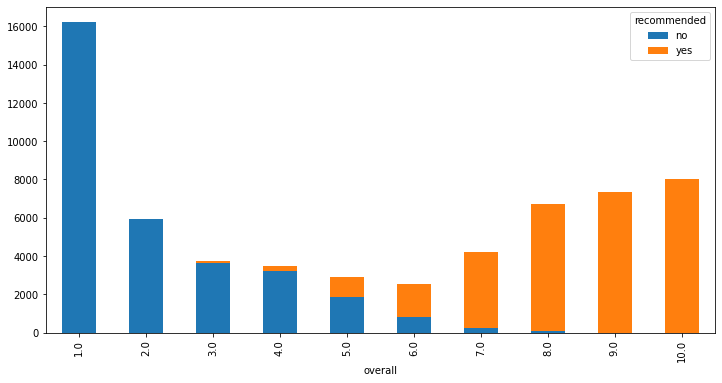

In [ ]:
# Get plot for the relationship between Recommendation and Overall rating.
stacked_plot('recommended')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


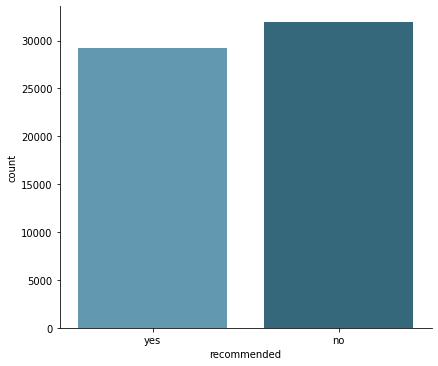

In [ ]:
# Ploting a bar graph to show count of class in recommended feature
sns.factorplot(x="recommended", data=main_df, kind="count", size=5, aspect=1.2, palette="PuBuGn_d")
plt.show()

####Droping all Non important columns/features

Here,we come across few columns which such as Author name , date, route , travel month which will not be having any impact on model.



In [ ]:
 # Droping Non important features
main_df.drop(['author','review_date','date_flown','route','travel_month','Avg_num'],axis=1,inplace=True)

In [ ]:
# main_df.drop(['Avg_num'],axis=1,inplace=True)
# main_df.drop(['travel_month'],axis=1,inplace=True)

## working on Text and Categorical features

**Airline**

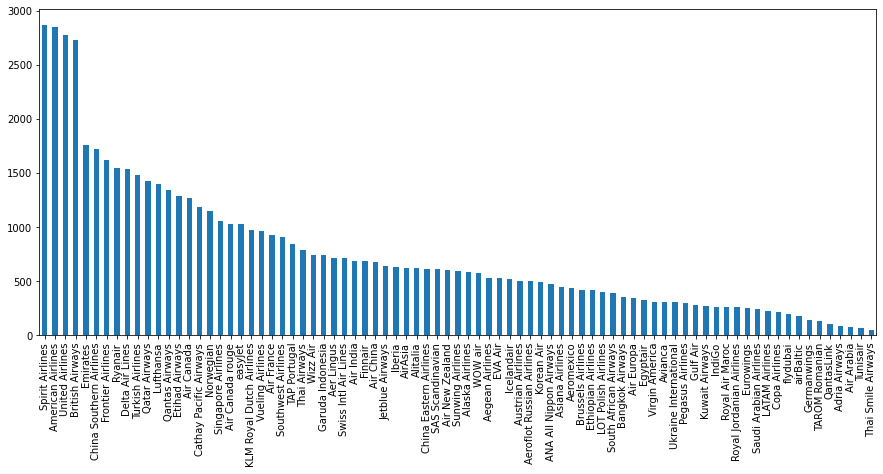

In [ ]:
# Graph showing count of each airline.
main_df['airline'].value_counts().plot(kind='bar',figsize=(15,6))

We can do one hot incoding to these categorical values.

**Cabin**

In [ ]:
# Counting number of unique classes in this feature
main_df['cabin'].value_counts()

Economy Class      45171
Business Class      9590
Premium Economy     2412
First Class         1532
Name: cabin, dtype: int64

**Travel Type**

In [ ]:
# Counting number of unique classes in this feature
main_df['traveller_type'].value_counts()

Solo Leisure      13935
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: traveller_type, dtype: int64

###Converting text values into numerical values 

In [ ]:
# Converting text into numerical
# replacing yes =1 and no =0 in recommended column
main_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
# checking for NaN values in columns
main_df.isna().sum()

airline                0
overall                0
customer_review        0
traveller_type     23643
cabin               2478
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended            0
dtype: int64

## Sentiment analysis using vadar

In [ ]:
# Install vaderSentiment package
pip install vaderSentiment

     |████████████████████████████████| 133kB 5.2MB/s 


In [ ]:
# Import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
  
    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return  sentiment_dict['compound']

In [ ]:
# Creating a polarity column
# to store sentiment analysis score on text data
main_df['polarity']= main_df['customer_review'].apply(sentiment_scores)

## Converting qualitative features into number for machine learning as  most machine learning alogorithm takes numerical values.

 In our dataset we have 3 categorical columns. 
> Airline
 * airline columns have zero NaN values.So, we can we Dummy variable encoding as this will give us one less feature as airline column have large number of categoreis.

> Travell type
 * These values dont have natural ordering and column have NaN values. So, it's better to use One hot encoding.
 *  Here we have 4 class 
  * Solo
  * Couple
  * Family
  * Business

 

> Cabin
*  These values have a natural ordering as business class is expensive than economy class.
* We can rank these classes in this dataset. Higher ranking means better.
 * economy =  1
 * premium economy = 2
 * business class = 3
 * first class = 4

 * But we are having Nan value in these features. So, we will be doing one hot encoding.

   

###One hot encoding for categorical variables

In [ ]:
# categoriacal features to do one hot encoding
colms=['airline','cabin','traveller_type']

In [ ]:
new_df= pd.get_dummies(main_df,columns=colms)

In [ ]:
# Define independent features
ind_features = new_df.columns.drop(['customer_review','recommended'])


In [ ]:
# Define dependent features
dep_features = 'recommended'

In [ ]:
# Get independent features
ind_features

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'polarity',
       'airline_ANA All Nippon Airways', 'airline_Adria Airways',
       'airline_Aegean Airlines', 'airline_Aer Lingus',
       'airline_Aeroflot Russian Airlines', 'airline_Aeromexico',
       'airline_Air Arabia', 'airline_Air Canada', 'airline_Air Canada rouge',
       'airline_Air China', 'airline_Air Europa', 'airline_Air France',
       'airline_Air India', 'airline_Air New Zealand', 'airline_AirAsia',
       'airline_Alaska Airlines', 'airline_Alitalia',
       'airline_American Airlines', 'airline_Asiana Airlines',
       'airline_Austrian Airlines', 'airline_Avianca',
       'airline_Bangkok Airways', 'airline_British Airways',
       'airline_Brussels Airlines', 'airline_Cathay Pacific Airways',
       'airline_China Eastern Airlines', 'airline_China Southern Airlines',
       'airline_Copa Airlines', 'airline_Delta Air Lines', 'airline_EVA 

## Feature scaling 


In [ ]:
#  Get features
 data = new_df[ind_features]
 Y= new_df[dep_features]

In [ ]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Create an object for MinMaxScaler
feature_scaler= MinMaxScaler()

In [ ]:
# Fit the data to perform scaling
data = feature_scaler.fit_transform(data)

In [ ]:
data

array([[0.66666667, 0.75      , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22222222, 0.        , 0.75      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Training the dataset 


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split

In [ ]:
# Perform Train Test Split
X_train,X_test,y_train,y_test = train_test_split(data,Y, test_size =0.2)


In [ ]:
# Get shapes for Train and Test set
X_train.shape,X_test.shape

((48946, 97), (12237, 97))

array([[0.11111111, 0.75      , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.5       , 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22222222, 0.5       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Building classifier model using Logistic Regression

In [ ]:
# Fit training data on LR
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)*100
test_accuracy = accuracy_score(test_class_preds,y_test)*100

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  96.17129081028072
The accuracy on test data is  96.15918934379341


In [ ]:
# Get the confusion matrix for both train and test

cm1 = confusion_matrix(y_train, train_class_preds)
print('confusion matrix of train \n', cm1)

cm2 = confusion_matrix(y_test, test_class_preds)
print('confusion matrix of test \n', cm2)


confusion matrix of train 
 [[24592   939]
 [  935 22480]]
confusion matrix of test 
 [[6187  222]
 [ 248 5580]]


In [ ]:
# Getting all the accuracy metrics of training model
tn, fp, fn, tp = confusion_matrix(y_train, train_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.960
Specificity: 0.963
Precision: 0.960


In [ ]:
# Getting all the accuracy metrics of test model
tn, fp, fn, tp = confusion_matrix(y_test, test_class_preds).ravel()

sensitivity = tp / (tp+fn) # Recall.
specificity = tn / (tn+fp)
precision = tp / (tp+fp)

print('Sensitivity/Recall: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)
print('Precision: %.3f' % precision)

Sensitivity/Recall: 0.957
Specificity: 0.965
Precision: 0.962


## Using Different Cross validation techniques

In [ ]:
#Perform KFold CV
from sklearn.model_selection import KFold

# Define K folds as 4
kf = KFold(n_splits=4)

# Perform RepeatedKFold CV 
scores = []
for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    scores.append(
        accuracy_score(clf.fit(X_train, y_train).predict(X_test), y_test))
    
# Get mean scores for the K folds    
np.mean(scores)

#  Get all accuracy scores for all K folds 
for i in scores:
  i = round(i*100,4)

  print(i)

95.8813
95.4759
95.7636
97.2605


In [ ]:
# RepeatedKFold
from sklearn.model_selection import RepeatedKFold

# Define K folds as 4
rkf = RepeatedKFold(n_splits=4, n_repeats=2)

# Perform RepeatedKFold CV 
scores = []
for train_index, test_index in rkf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    scores.append(
        accuracy_score(clf.fit(X_train, y_train).predict(X_test), y_test)
    )

# Get mean scores for the K folds
np.mean(scores)

# Get all accuracy scores for all K folds
for i in scores:
  i = round(i*100,4)
  print(i)

96.1297
96.2343
95.9467
96.1098
96.2278
95.9532
96.0447
96.1556


In [ ]:
# Code for K fold Cross validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = clf
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('10 fold scores:',scores)
print('Avg Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

10 fold scores: [0.96426237 0.95467422 0.96230115 0.95925038 0.96513402 0.96251907
 0.95794291 0.96142951 0.96098518 0.95989538]
Avg Accuracy: 0.961 (0.003)


##Build Classifier model using Random Forest

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

# Fit training data
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   0.8s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.3s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.4s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  7.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Get best estimator
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [ ]:
# Calculate, accuracy and auc on train data
rf_train_accuracy = accuracy_score(y_train,train_class_preds)
rf_train_auc = roc_auc_score(y_train,train_class_preds)

# Calculate, accuracyand auc on train data
rf_test_accuracy = accuracy_score(y_test,test_class_preds)
rf_test_auc = roc_auc_score(y_test,test_class_preds)

# Print the results for train
print("Performance on train data ")
print("Accuracy : " ,rf_train_accuracy)
print("AUC ROC Score : ", rf_train_auc)
print("\n")

# Print the results for test
print("Performance on test data ")
print("Accuracy : " ,rf_test_accuracy)
print("AUC ROC Score : ", rf_test_auc)
print("\n")

Performance on train data 
Accuracy :  0.9596626569037657
AUC ROC Score :  0.959266447368421


Performance on test data 
Accuracy :  0.9583524027459954
AUC ROC Score :  0.9579232500038528




In [ ]:
# Get confusion matrix for train and test data sets
conf_matrix_train = confusion_matrix(y_train,train_class_preds)
conf_matrix_test = confusion_matrix(y_test,test_class_preds)

print("The Confusion Matrix for Train Set \n",conf_matrix_train)
print("\n")
print("The Confusion Matrix for Test Set \n",conf_matrix_test)

The Confusion Matrix for Train Set 
 [[23229   771]
 [ 1080 20808]]


The Confusion Matrix for Test Set 
 [[7695  245]
 [ 392 6963]]


No handles with labels found to put in legend.


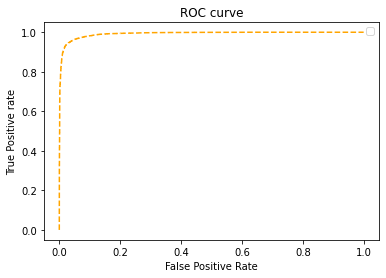

In [ ]:
# Get ROC curve on Test data
fpr, tpr, thresh = roc_curve(y_test, test_preds, pos_label=1)
plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc='best')

In [ ]:
# Function to plot precision recall curve
def plot_precision_recall_vs_threshold(predictor,predicted):
  '''
  Function to plot  precision recall curve
  '''
  precisions,recalls,thresholds=precision_recall_curve(predictor,predicted)
  plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
  plt.plot(thresholds,recalls[:-1],"g--",label="Recalls")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0,1])
  plt.show()

In [ ]:
# Get precision recall curve on test data
plot_precision_recall_vs_threshold(y_test,test_class_preds)

###Plot the variable importance

In [ ]:
# Get feature importance
features = main_df.columns
importances = rf_optimal_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
# Plot feature importance graph
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

###Get feature importance using Shap

In [ ]:
# Install Shap
pip install shap

     |████████████████████████████████| 358kB 8.6MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491615 sha256=8b517386dfe37a9394a002b8b399058c415b5f3f53a750c8f526e46b5901f453
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


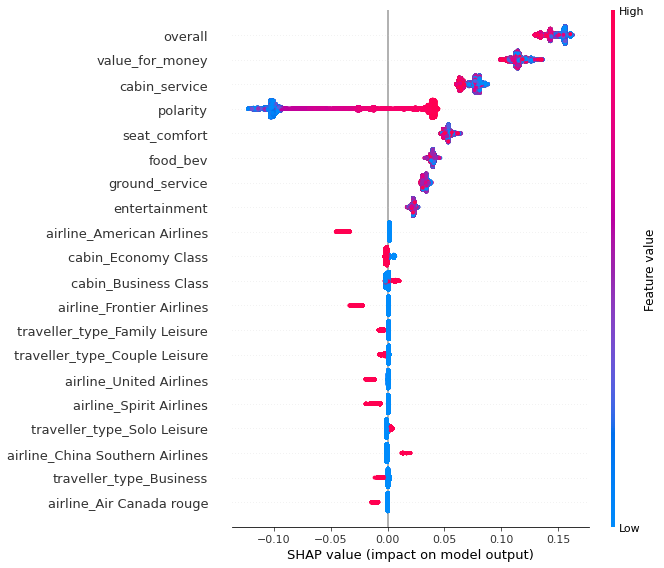

In [ ]:
# Get the Shap summary of important features on test data to analyze how each feature contribute in the insurance decisioning process.
import shap
X_shap=new_df.drop(['customer_review','recommended'],axis=1)
explainer = shap.TreeExplainer(rf_optimal_model)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values[1], X_shap, plot_type="dot")

From the above graph, we observe that the following are the top 5 features.
1. overall
2. value_for_money
3. cabin_service
4. Polarity
5. seat_comfort


From the above graph, we have observed that-
* 'Overall' feature contribute most to the model's prediction.
* 'Premium Economy' feature contribute the lowest to the model's prediction.


In [ ]:
# Get features used in training model
X_test.columns

Index(['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'Business', 'Couple Leisure',
       'Family Leisure', 'Solo Leisure', 'Business Class', 'Economy Class',
       'First Class', 'Premium Economy'],
      dtype='object')

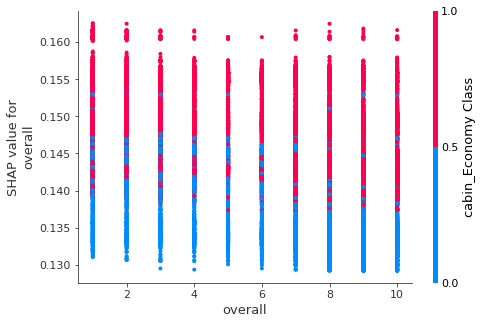

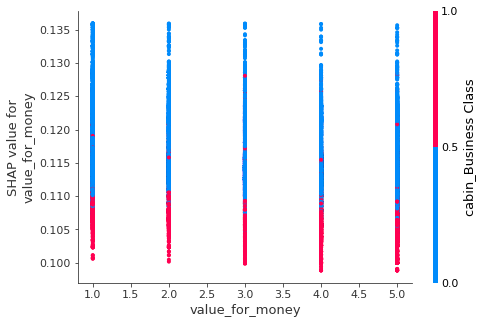

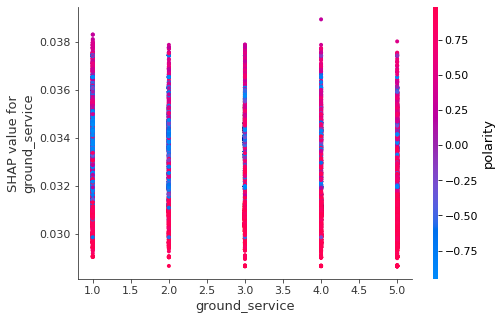

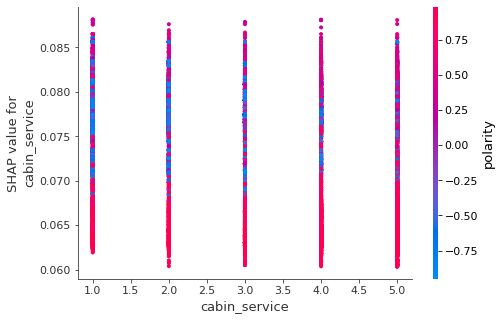

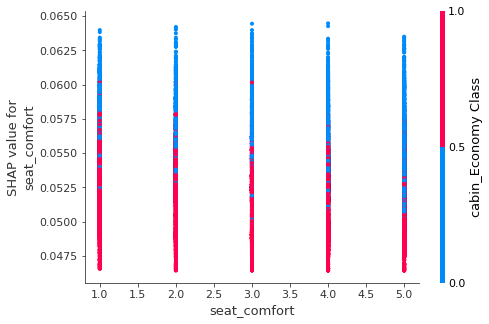

In [ ]:
#  Plot dependence of a varaiable on others on test set
top_vars = ['overall', 'value_for_money','ground_service','cabin_service','seat_comfort']
for var in top_vars:
  shap.dependence_plot(var,shap_values[1],new_df.drop(['customer_review','recommended'],axis=1))

The above graph shows the dependence of each of the top 5 features.
*Overall has a dependence on Cabin service and so on.

In [ ]:
import time
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#Declare the models
lr_model=LogisticRegression(C=10)
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier(max_depth= 60, min_samples_leaf = 1, min_samples_split= 5)
gbc_model=GradientBoostingClassifier()
xgb_model=XGBClassifier()
svc_model=LinearSVC()
Mnb_model=MultinomialNB()


#Create a list of models
models=[lr_model,svc_model,Mnb_model,dt_model,rf_model,gbc_model,xgb_model]

#Creating dictionay for storing the confustion matix
dct_train={}
dct_test={}
lst_imp=[]
# Fuction for calculation the eveluation matrix
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #Read model one by one
    for model in models:
        start = time.time()
        model.fit(X_train,y_train)
        end= time.time()
        y_pred=model.predict(X_test)
        y_pred_train=model.predict(X_train)
        
        #Compute metrics
        train_accuracy=accuracy_score(y_train,y_pred_train)
        test_accuracy=accuracy_score(y_test,y_pred)
        p_score_train=precision_score(y_train,y_pred_train)
        p_score=precision_score(y_test,y_pred)
        r_score_train=recall_score(y_train,y_pred_train)
        r_score=recall_score(y_test,y_pred)
        train_auc = roc_auc_score(y_train,y_pred_train)
        test_auc = roc_auc_score(y_test,y_pred)
        fp, tp, th = roc_curve(y_test, y_pred)
        
        #Insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Train_Accuracy"]=round(train_accuracy*100,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy*100,2)
        df.loc[i,"Precision_Train"]=round(p_score_train*100,2)
        df.loc[i,"Precision_Test"]=round(p_score*100,2)
        df.loc[i,"Recall_Train"]=round(r_score_train*100,2)
        df.loc[i,"Recall_test"]=round(r_score*100,2)
        df.loc[i,"ROC_AUC_Train"]=round(train_auc*100,2)
        df.loc[i,"ROC_AUC_Test"]=round(test_auc*100,2)
        df.loc[i,'AUC'] = auc(fp, tp)
        df.loc[i,'MOdel_training_time ']= end-start
        #Inserted in dictionary
        dct_train[model.__class__.__name__]=confusion_matrix(y_train,y_pred_train)
        dct_test[model.__class__.__name__]=confusion_matrix(y_test,y_pred)

        i+=1
    # Return the data frame and dictionary
    return df,dct_train,dct_test

In [ ]:
# Get performance matrix dataframe for different classifiers.
final_result_df,dct_train,dct_test=score_model(X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#  Get performance on different models
final_result_df

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Train,Precision_Test,Recall_Train,Recall_test,ROC_AUC_Train,ROC_AUC_Test,AUC,MOdel_training_time
0,LogisticRegression,96.18,96.19,95.95,96.45,96.04,95.59,96.17,96.17,0.961664,1.651352
1,LinearSVC,96.18,96.18,95.97,96.46,96.03,95.57,96.18,96.16,0.961591,0.378130
2,MultinomialNB,87.68,87.70,82.68,82.96,93.83,93.66,87.95,87.92,0.879215,0.021195
3,DecisionTreeClassifier,100.00,94.68,100.00,94.61,100.00,94.30,100.00,94.66,0.946642,0.361679
4,RandomForestClassifier,99.07,96.11,99.05,96.59,99.00,95.27,99.07,96.08,0.960788,5.452318
5,GradientBoostingClassifier,96.19,96.10,96.04,96.41,95.96,95.43,96.18,96.07,0.960723,17.829539
6,XGBClassifier,96.10,96.10,96.02,96.49,95.79,95.36,96.09,96.08,0.960761,10.139972


From the above table, we have observed that-
* Best test set accuracy is found in LogisticRegression while lowest accuracy score is found in MultinomialNB.
* Best ROC_AUC score is given by LogisticRegression.
* We can conclude that LogisticRegression gives the best model.

##Conclusion:
* From the EDA, we have discovered that A320 is the most commonly used aircraft type and Spirit Airlines is the most flown aircraft by passengers.77% of passengers chose to fly in economy class as it is the most cheapest.

* We have built classifier models using 7 different types of classifiers and all these are able to give accuracy of more than 85%.* We can conclude that LogisticRegression gives the best model.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.